In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
SAMPLE_RATE = 44100 # hertz, how many datapoints represent sine wave per second
DURATION = 5 # seconds, lenght of generated sample

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    
    frequencies = x * freq
    
    y = np.sin((2*np.pi)*frequencies)
    
    return x, y

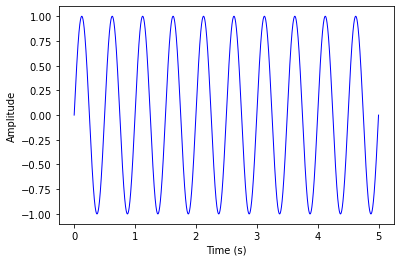

In [15]:
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)

plt.plot(x, y, '-', color='blue', lw=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [16]:
# Mixing audio signals is easy
# 1) Add signals together
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

# 2) Normalize result
# range int16 -32786 to 32767
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767) 

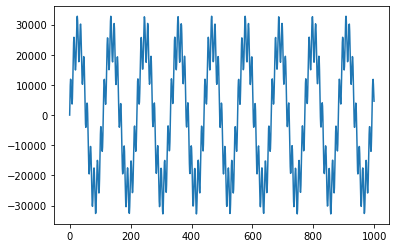

In [21]:
plt.plot(normalized_tone[:1000])
plt.show()

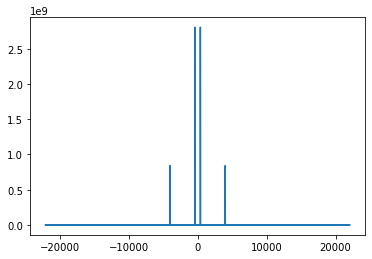

In [25]:
# Using FFT
N = SAMPLE_RATE * DURATION

yf = np.fft.fft(normalized_tone)
xf = np.fft.fftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

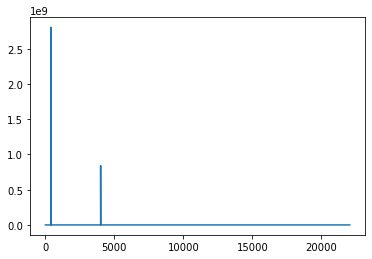

In [31]:
yf = np.fft.rfft(normalized_tone)
xf = np.fft.rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()